In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file = 'c2e1results.csv'
df = pd.read_csv(file)

df.head()

,Index,Speaker,Section,Scene,Category,Character,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,142,SAM,Part One,1,Dialogue,NOTT,"Oh! You're finally awake, I see.",6,surprise,0.877123,0.029428,0.018477,0.004126,0.034323,0.031333,0.005189,0.877123
1,144,SAM,Part One,1,Dialogue,NOTT,"You were out for quite some time, there. Rough...",4,neutral,0.802743,0.010214,0.079111,0.060549,0.007528,0.802743,0.030531,0.009323
2,145,LIAM,Part One,1,Dialogue,CALEB,"Not our best day, no.",5,sadness,0.581246,0.031540,0.079213,0.259437,0.003840,0.041202,0.581246,0.003522
3,146,SAM,Part One,1,Dialogue,NOTT,"No, I mean, usually you're so good at everythi...",4,neutral,0.775355,0.035300,0.117252,0.037986,0.008865,0.775355,0.015268,0.009973
4,147,LIAM,Part One,1,Dialogue,CALEB,Thank you.,4,neutral,0.674990,0.029117,0.015293,0.015141,0.237564,0.674990,0.009810,0.018085


In [23]:
# standard vad scores for each emotion
vad_scores = {
    "anger": np.array([-0.43, 0.67, 0.34]),
    "joy": np.array([0.76, 0.48, 0.35]),
    "surprise": np.array([0.4, 0.67, -0.13]),
    "disgust": np.array([-0.6, 0.35, 0.11]),
    "fear": np.array([-0.64, 0.6, -0.43]),
    "sadness": np.array([-0.63, 0.27, -0.33]),
}

emotion_columns = ["anger", "joy", "surprise", "disgust", "fear", "sadness"]

In [24]:
def calculate_weighted_vad(row, vad_scores, emotion_columns):

    weighted_vad = np.zeros(3)

    for emotion in emotion_columns:
        weighted_vad += row[emotion] * vad_scores[emotion]

    return weighted_vad

In [26]:
df["weighted_vad"] = df.apply(calculate_weighted_vad, axis=1, args=(vad_scores, emotion_columns))
df[["text", "weighted_vad"]].head()

,text,weighted_vad
0,"Oh! You're finally awake, I see.","[0.34728502656999993, 0.6342082620299999, -0.0..."
1,"You were out for quite some time, there. Rough...","[-0.10039404137499999, 0.08896522762, -0.02251..."
2,"Not our best day, no.","[-0.5889876243159999, 0.365657874152, -0.28304..."
3,"No, I mean, usually you're so good at everythi...","[-0.10873385381, 0.10254064538999999, 0.005333..."
4,Thank you.,"[0.15021594365000002, 0.16274194829000002, 0.0..."


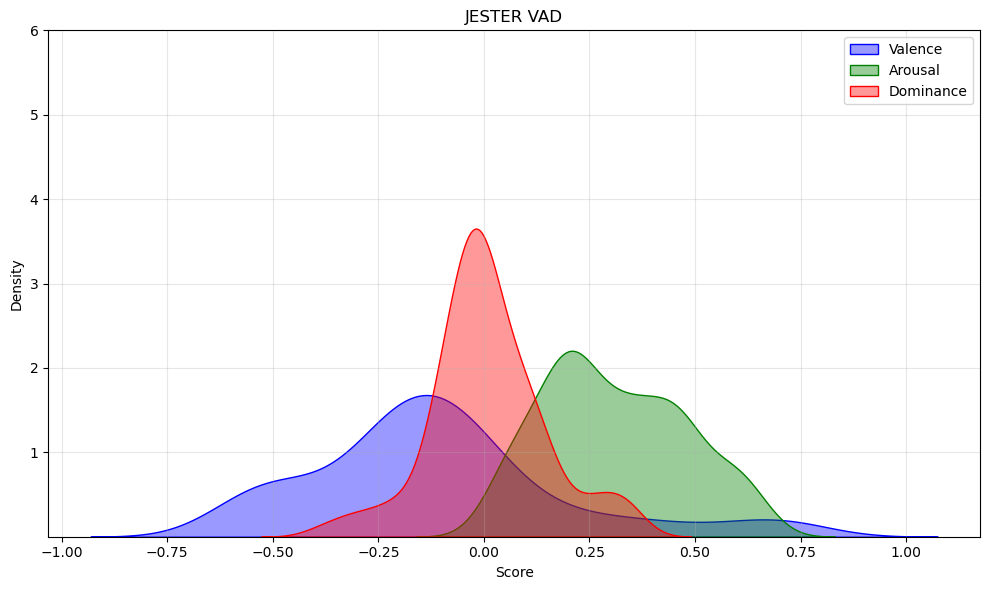

In [35]:
# JESTER
jester_data = df[df["Character"] == "JESTER"]

vad_values = np.array(jester_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.yticks(ticks=[1, 2, 3, 4, 5, 6])
plt.ylabel("Density")
plt.title("JESTER VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/jester_VAD.png")

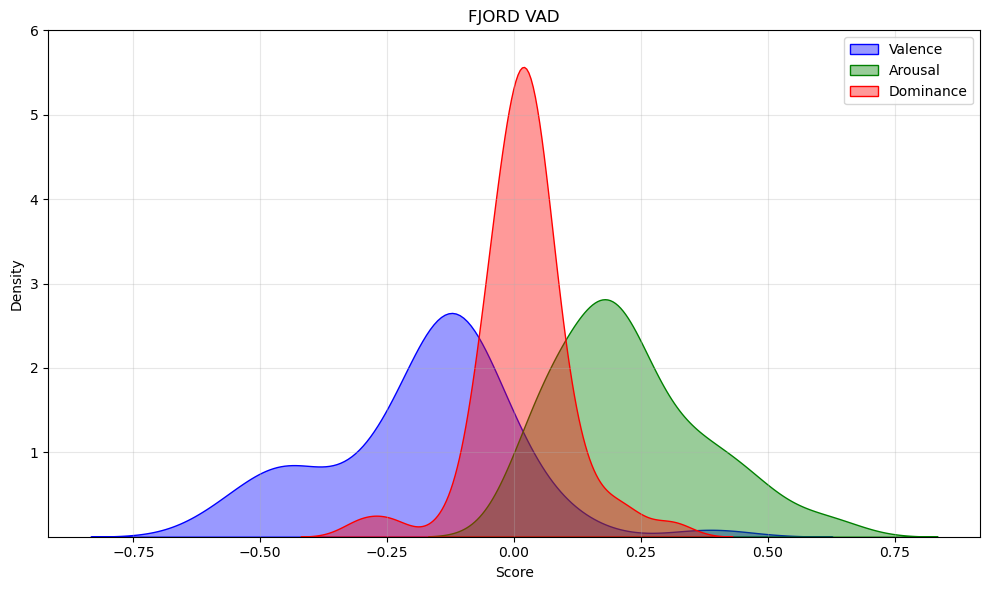

In [36]:
# FJORD
fjord_data = df[df["Character"] == "FJORD"]

vad_values = np.array(fjord_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.yticks(ticks=[1, 2, 3, 4, 5, 6])
plt.ylabel("Density")
plt.title("FJORD VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/fjord_VAD.png")

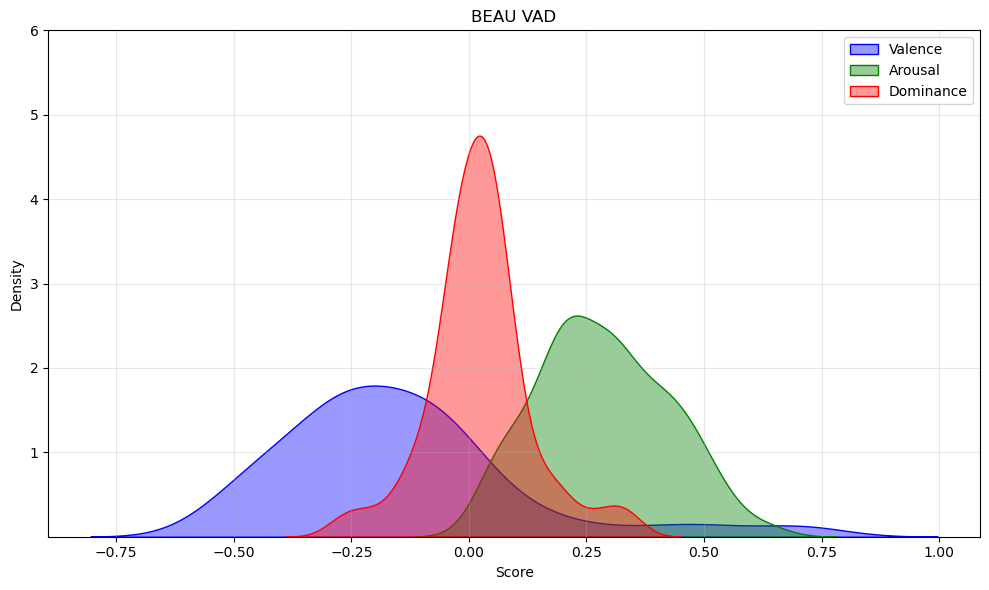

In [37]:
# BEAU
beau_data = df[df["Character"] == "BEAU"]

vad_values = np.array(beau_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.yticks(ticks=[1, 2, 3, 4, 5, 6])
plt.ylabel("Density")
plt.title("BEAU VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/beau_VAD.png")

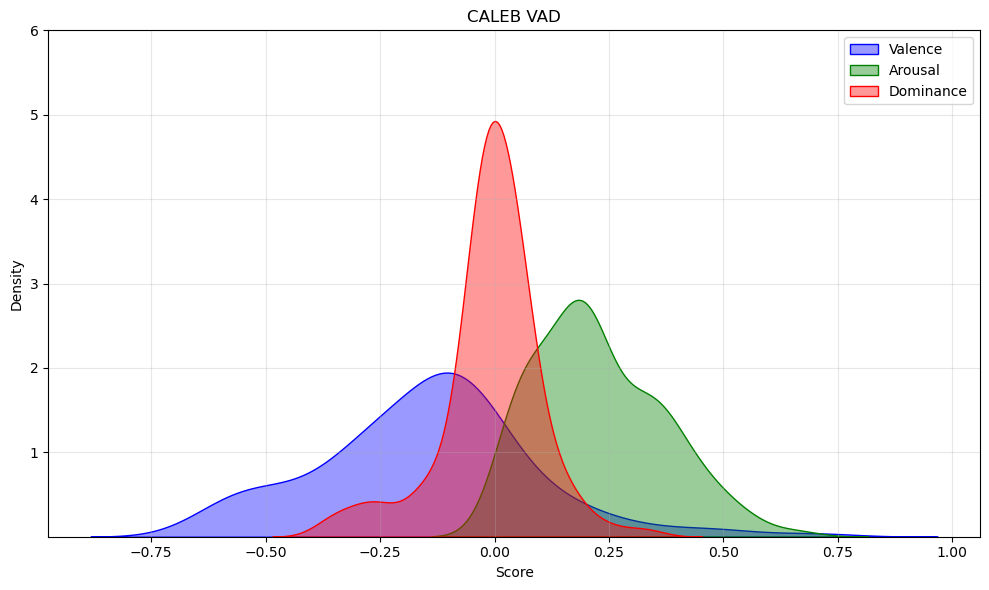

In [38]:
# CALEB
caleb_data = df[df["Character"] == "CALEB"]

vad_values = np.array(caleb_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.yticks(ticks=[1, 2, 3, 4, 5, 6])
plt.ylabel("Density")
plt.title("CALEB VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/caleb_VAD.png")

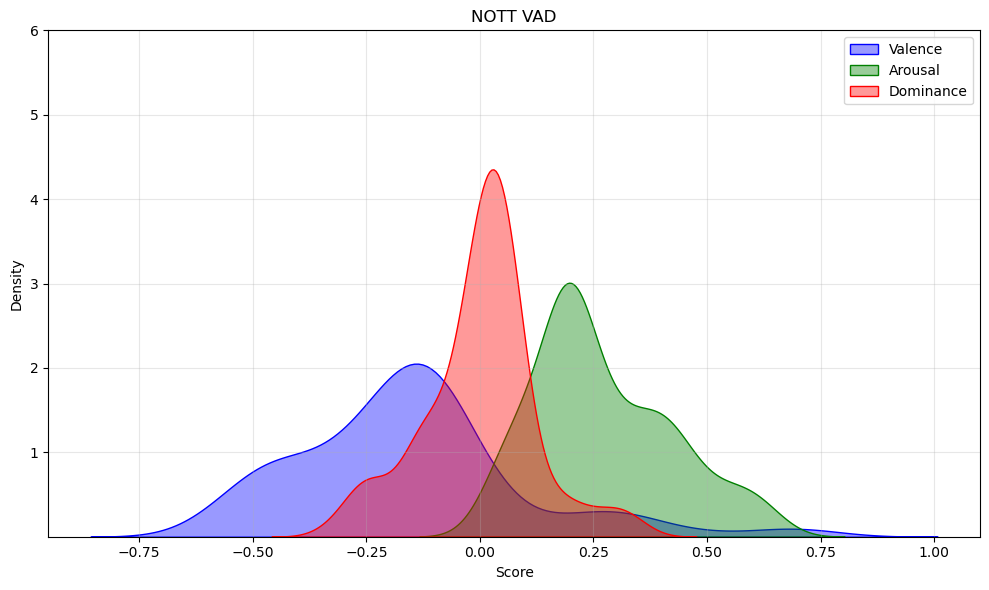

In [39]:
# NOTT
nott_data = df[df["Character"] == "NOTT"]

vad_values = np.array(nott_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.yticks(ticks=[1, 2, 3, 4, 5, 6])
plt.ylabel("Density")
plt.title("NOTT VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/nott_VAD.png")

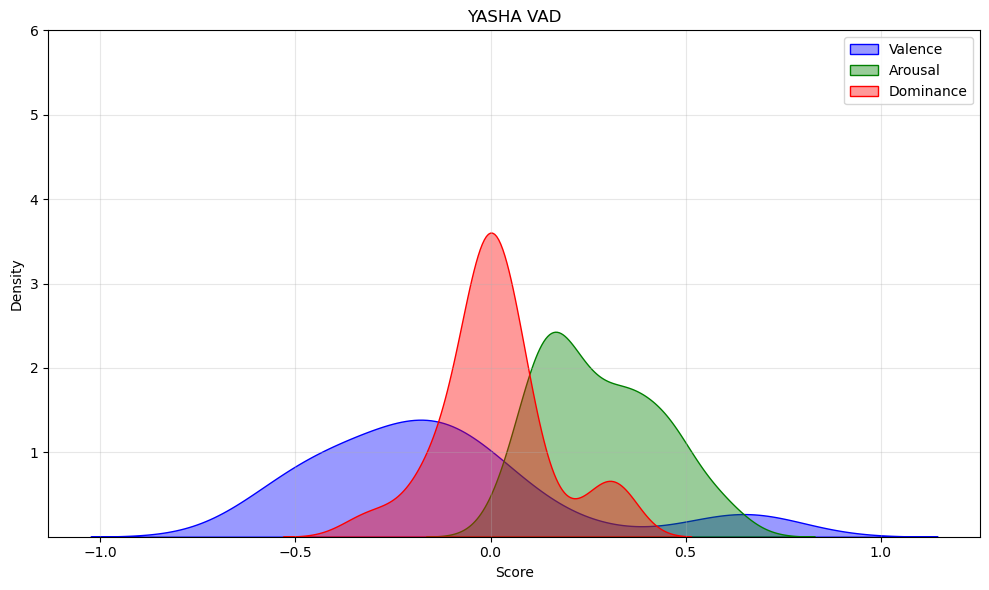

In [40]:
# YASHA
yasha_data = df[df["Character"] == "YASHA"]

vad_values = np.array(yasha_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.yticks(ticks=[1, 2, 3, 4, 5, 6])
plt.ylabel("Density")
plt.title("YASHA VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/yasha_VAD.png")

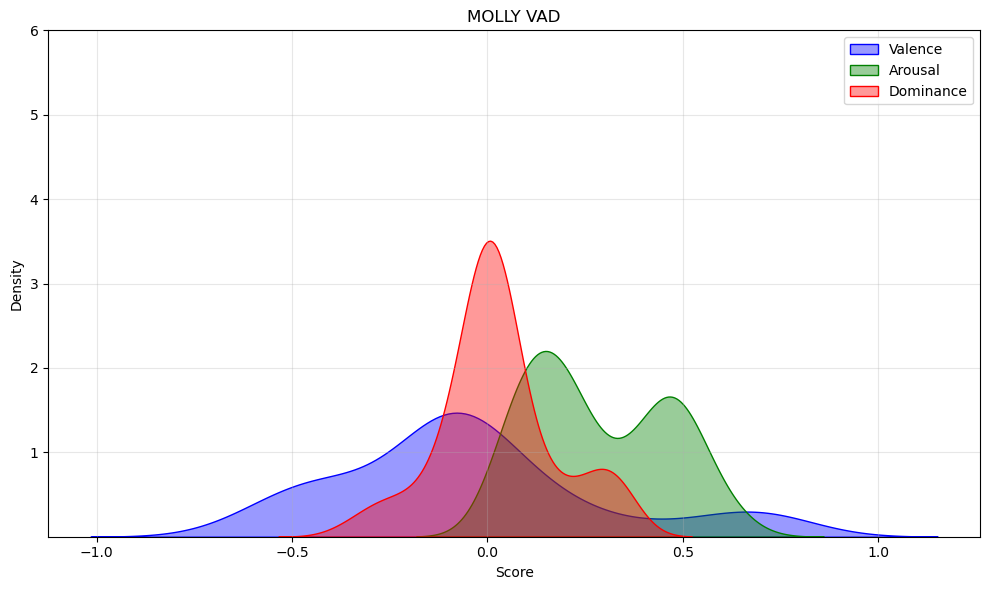

In [41]:
# MOLLY
molly_data = df[df["Character"] == "MOLLY"]

vad_values = np.array(molly_data["weighted_vad"].tolist())
valence = vad_values[:, 0]
arousal = vad_values[:, 1]
dominance = vad_values[:, 2]

plt.figure(figsize=(10, 6))
sns.kdeplot(valence, label="Valence", color="blue", fill=True, alpha=0.4)
sns.kdeplot(arousal, label="Arousal", color="green", fill=True, alpha=0.4)
sns.kdeplot(dominance, label="Dominance", color="red", fill=True, alpha=0.4)

plt.xlabel("Score")
plt.yticks(ticks=[1, 2, 3, 4, 5, 6])
plt.ylabel("Density")
plt.title("MOLLY VAD")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("figures/molly_VAD.png")

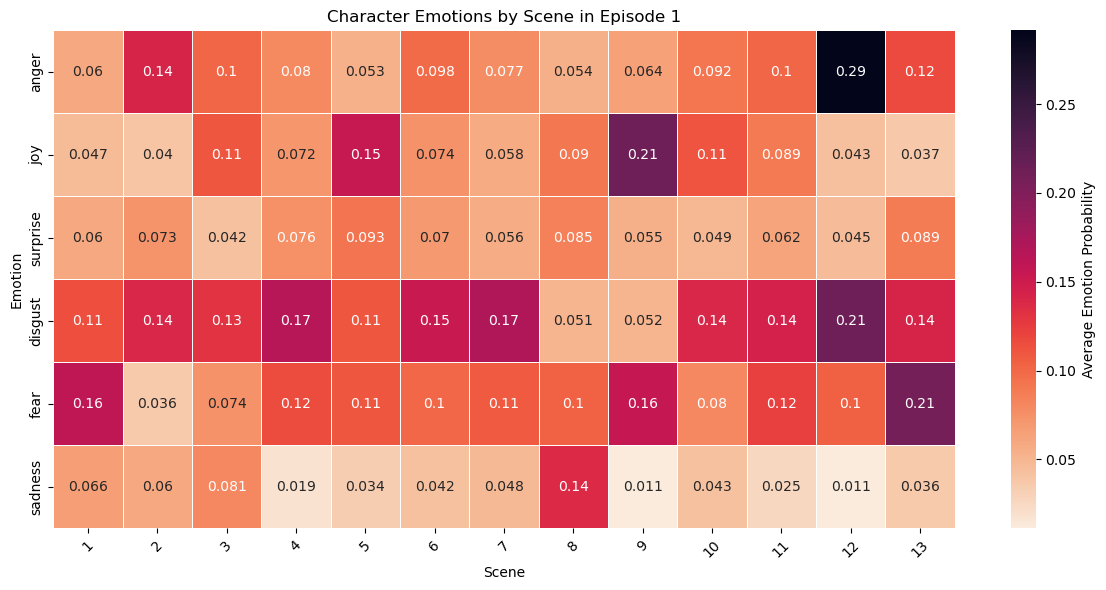

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df["Scene"] = pd.to_numeric(df["Scene"])

# Extract relevant data
emotion_columns = ["anger", "joy", "surprise", "disgust", "fear", "sadness"]

# Normalize emotion probabilities for each scene
# df["Scene"] = df["Scene"].astype(str)  # Ensure 'Scene' is treated as a string
emotion_data = df.groupby("Scene")[emotion_columns].mean()  # Average probabilities per scene

emotion_data = emotion_data.sort_index()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    emotion_data.T,  # Transpose to make emotions the y-axis
    cmap=sns.color_palette("rocket_r", as_cmap=True),
    #"YlGnBu",   # Heatmap color scheme
    annot=True,      # Show values in cells
    cbar_kws={"label": "Average Emotion Probability"},
    linewidths=0.5
)

# Add labels and title
plt.xlabel("Scene")
plt.ylabel("Emotion")
plt.title("Character Emotions by Scene in Episode 1")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.savefig("figures/heatmap_categorical.png")
plt.show()

In [30]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Define the main characters
main_characters = {"BEAU", "FJORD", "JESTER", "MOLLY", "YASHA", "CALEB", "NOTT"}

# Filter the dataframe to include only rows where the speaker is a main character
main_character_data = df[df["Character"].isin(main_characters)]

# Initialize directed sentiment dictionary
directed_sentiment = defaultdict(lambda: defaultdict(list))

# Loop through the rows of the filtered dataframe
for i in range(1, len(main_character_data)):
    # Current speaker
    current_speaker = main_character_data.iloc[i]["Character"]
    
    # Previous speaker
    previous_speaker = main_character_data.iloc[i - 1]["Character"]
    
    # Check if both speakers are main characters
    if current_speaker in main_characters and previous_speaker in main_characters:
        # Sentiment (Valence) of the current statement
        valence = main_character_data.iloc[i]["weighted_vad"][0]  # Extract Valence
        
        # Add sentiment directed to the previous speaker
        directed_sentiment[previous_speaker][current_speaker].append(valence)

# Aggregate results (e.g., average valence for each pair)
directed_sentiment_avg = {
    from_char: {
        to_char: np.mean(sentiments)
        for to_char, sentiments in to_dict.items()
    }
    for from_char, to_dict in directed_sentiment.items()
}

# Convert the result to a DataFrame for visualization
sentiment_df = pd.DataFrame(directed_sentiment_avg).fillna(0)

# Display the directed sentiment matrix
print(sentiment_df)

            NOTT     CALEB    JESTER     FJORD      BEAU     MOLLY     YASHA
NOTT   -0.154570 -0.205783 -0.106263 -0.031982 -0.193479 -0.446943 -0.103839
CALEB  -0.172768 -0.157513 -0.149056 -0.125563 -0.125803 -0.116176  0.082439
JESTER -0.092391 -0.069404 -0.145473 -0.260571 -0.029489 -0.097164 -0.172693
BEAU   -0.027157 -0.088550 -0.172986 -0.140926 -0.150259 -0.132341 -0.200522
FJORD  -0.159025 -0.092594 -0.151577 -0.133905 -0.281036 -0.135042 -0.249141
YASHA  -0.099776 -0.269535 -0.250453 -0.164608 -0.171059  0.046994 -0.178250
MOLLY  -0.423961 -0.265904 -0.055613 -0.074657 -0.029546 -0.142602  0.118544


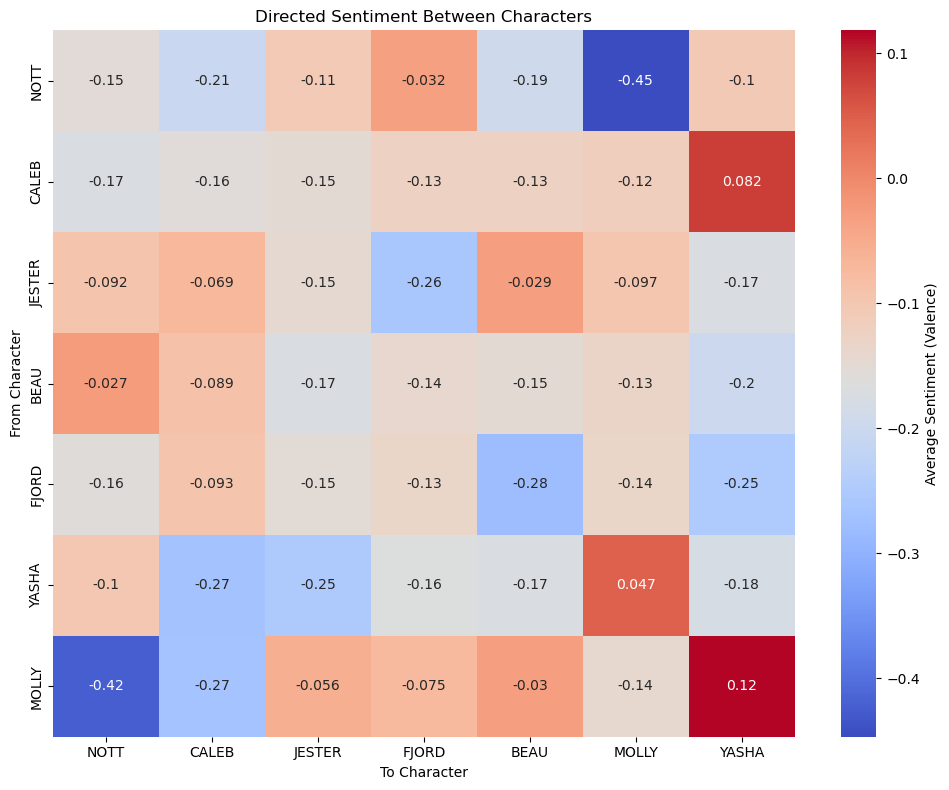

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(sentiment_df, annot=True, cmap="coolwarm", cbar_kws={"label": "Average Sentiment (Valence)"})
plt.title("Directed Sentiment Between Characters")
plt.xlabel("To Character")
plt.ylabel("From Character")
plt.tight_layout()
plt.show()